In [1]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
file = 'tmp/r490_results/null.npz'
d = np.load(file, allow_pickle=True)
null_ae = d['split_ae']
null_mae_by_output = np.mean(null_ae, axis=1)

In [3]:
files = ['tmp/r490_results/linear_all_effects.npz',
         'tmp/r490_results/quadratic_all_effects.npz',
         'tmp/r490_results/rbfm.npz',
         'tmp/r490_results/ann.npz']

rows = []
for file in files:
    d = np.load(file, allow_pickle=True)
    cfg = d['cfg'].tolist()
    output_cols = cfg['output_cols']
    labels = [l.replace('process_','') for l in output_cols]

    ae = d['split_ae']
    
    mae_by_output = np.mean(ae, axis=1)
    
    rel_mae_by_output = mae_by_output / null_mae_by_output
    n_repeats, n_outputs = rel_mae_by_output.shape
    
    for r in range(n_repeats):
        for o in range(n_outputs):
            rows.append({
                "model" : cfg['model']['name'],
                "repeat" : r,
                "output" : labels[o],
                "rel_output_mae" : rel_mae_by_output[r, o],
                "output_mae" : mae_by_output[r, o],
            })

results = pd.DataFrame(rows)
results

,model,repeat,output,rel_output_mae,output_mae
0,Linear (All Effects),0,Hydrogen,0.742671,1.663161e-06
1,Linear (All Effects),0,Methane,0.674798,7.581287e-05
2,Linear (All Effects),0,Ethane,0.410795,2.487413e-04
3,Linear (All Effects),0,Propane,0.128532,2.973766e-04
4,Linear (All Effects),0,i-Butane,0.255421,1.849789e-04
...,...,...,...,...,...
755,ANN,9,Mcyclopentan,0.012484,2.366835e-05
756,ANN,9,Benzene,0.761445,5.496720e-07
757,ANN,9,Cyclohexane,0.012786,2.374488e-05
758,ANN,9,2-Mhexane,0.020780,4.899968e-05


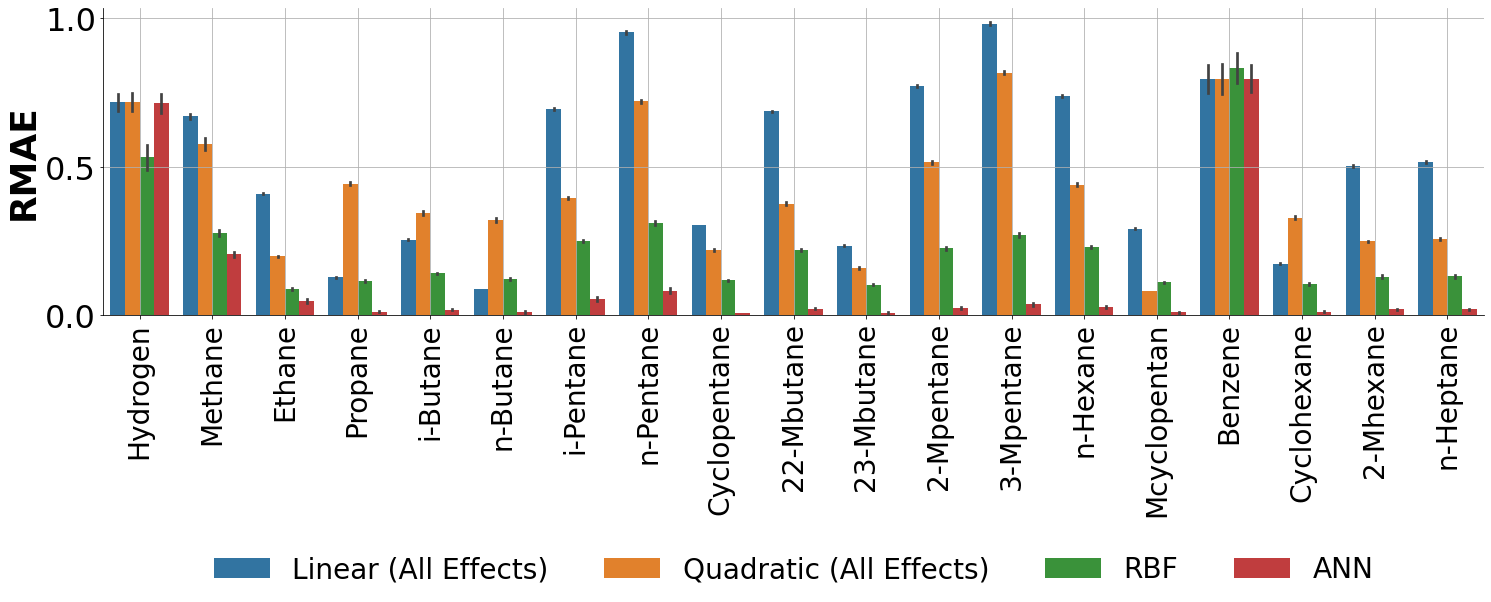

In [4]:
g = sns.catplot(y="rel_output_mae", x="output", hue="model", 
                data=results, kind='bar', ci='sd', aspect=4, height=5, 
                legend=False)
ax = g.ax
ax.tick_params(axis='x', labelsize=28, rotation=90)
ax.tick_params(axis='y', labelsize=32)
ax.set_xlabel('')
ax.set_ylabel('RMAE', fontsize=36, fontweight='bold')
ax.legend(frameon=False)
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.70),
          fancybox=False, shadow=False, frameon=False, ncol=5,
         fontsize=28)